This notebook contains codes to produce plots in General Trends section. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import matplotlib
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)
# matplotlib.rcParams['figure.dpi']= 200
import altair as alt
pd.set_option('display.max_rows', 500)
import numpy as np
import plotnine as p9
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
import selenium

In [2]:
author = pd.read_csv('../data/ht_class/ht_cleaned_author_df.csv')
paper = pd.read_csv('../data/ht_class/ht_cleaned_paper_df.csv')

In [3]:
colors = [
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf",
]
sns.color_palette(colors)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

### Tracks

In [4]:
dic = dict(Counter(paper[paper.Year < 2021].Conference))
conf_df = pd.DataFrame(
    dic.items(), 
    columns = ['Conference track', 'Number of publications'])
conf_df.sort_values(by='Number of publications', inplace = True)

In [5]:
conf_df

,Conference track,Number of publications
3,SciVis,291
2,VAST,572
0,InfoVis,834
1,Vis,1373


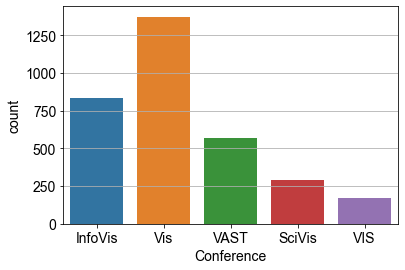

In [6]:
sns.color_palette(colors)
sns.countplot(x = 'Conference', data = paper)
plt.grid(axis = 'y')

In [7]:
alt.Chart(conf_df).mark_bar().encode(
    x = alt.X(
        'Conference track',
        sort = [
            'VIS',
            'SciVis',
            'VAST',
            'InfoVis',
            'Vis',
        ]
    ),
    y = 'Number of publications',
    color = 'Conference track'
)

alt.Chart(...)

### Number of publications by year

In [8]:
pub_num_df = paper.groupby(
    'Year').size().reset_index(name = 'Number of Publications')
pub_num_df['Year'] = pd.to_datetime(
    pub_num_df['Year'], format="%Y"
)
pub_num_df.head()

,Year,Number of Publications
0,1990-01-01,52
1,1991-01-01,50
2,1992-01-01,53
3,1993-01-01,55
4,1994-01-01,53


In [9]:
pub_num_df.tail()

,Year,Number of Publications
27,2017-01-01,114
28,2018-01-01,127
29,2019-01-01,129
30,2020-01-01,157
31,2021-01-01,170


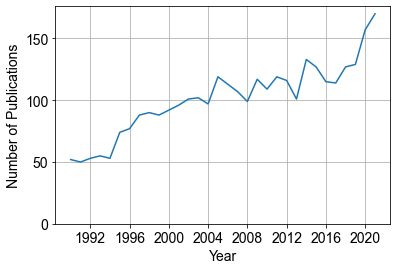

In [10]:
g = sns.lineplot(x = 'Year', y = 'Number of Publications', data = pub_num_df)
g.set_ylim(0,)
plt.grid()

In [11]:
pub_num = alt.Chart(pub_num_df).mark_line().encode(
    x = 'Year',
    y = alt.Y(
        'Number of Publications',
        title = 'Number of publications'
    )
)

pub_num

alt.Chart(...)

In [12]:
# (ggplot(pub_num_df, aes('Year', 'Number of Publications'))
#  + p9.theme_bw()
#  + p9.geom_line() 
# )

### Number of unique authors

In [13]:
# how many rows miss openalex author id
author[author['OpenAlex Author ID'].isnull()].shape[0]

110

In [14]:
author_with_author_id = author[
    author['OpenAlex Author ID'].notnull()]

In [15]:
unique_author_num_df = author_with_author_id.groupby(
    'Year')['OpenAlex Author ID'].nunique().reset_index(
    name = 'Number of Unique Authors')
unique_author_num_df['Year'] = pd.to_datetime(
    unique_author_num_df['Year'], format="%Y",
)
unique_author_num_df.head()

,Year,Number of Unique Authors
0,1990-01-01,118
1,1991-01-01,126
2,1992-01-01,121
3,1993-01-01,117
4,1994-01-01,130


In [16]:
unique_author_num_df.tail()

,Year,Number of Unique Authors
27,2017-01-01,455
28,2018-01-01,494
29,2019-01-01,551
30,2020-01-01,640
31,2021-01-01,670


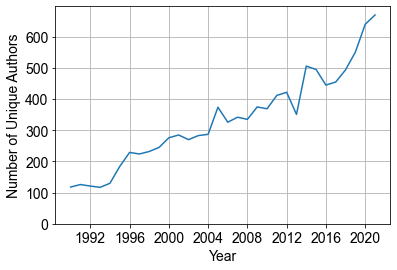

In [17]:
g = sns.lineplot(x = 'Year', 
                 y= 'Number of Unique Authors', 
                 data = unique_author_num_df
                )
g.set_ylim(0,)
plt.grid()

In [18]:
unique_authors = alt.Chart(unique_author_num_df).mark_line().encode(
    x = 'Year',
    y = alt.Y(
        'Number of Unique Authors',
        title = 'Number of unique authors'
    )
)

unique_authors

alt.Chart(...)

In [19]:
# alt.layer(
#     pub_num,
#     unique_authors
# )

In [20]:
# (ggplot(unique_author_num_df, aes('Year', 'Number of Unique Authors'))
#  + p9.theme_bw()
#  + p9.geom_line() 
# )

### Average number of authors

In [21]:
author_num_df = paper.groupby(
    'Year')['Number of Authors'].mean().to_frame().reset_index()
author_num_df.tail()

,Year,Number of Authors
27,2017,4.728070
28,2018,4.629921
29,2019,5.255814
30,2020,5.050955
31,2021,4.970588


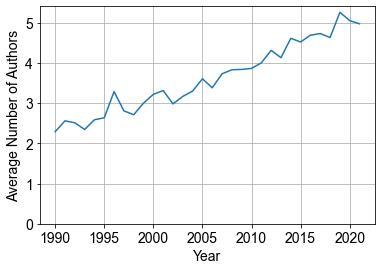

In [22]:
g = sns.lineplot(x='Year', 
                 y='Number of Authors', 
                 data = author_num_df)
g.set_ylim(0,)
g.set_ylabel('Average Number of Authors')
plt.grid()
plt.savefig('../results/supp/ave_author_num.pdf')

In [23]:
# (ggplot(author_num_df, aes('Year', 'Number of Authors'))
#  + p9.geom_line() 
# )

In [24]:
def get_total_and_ratio_by_year(DF, BY, subgroup_par):
    tuples = []
    for group in DF.groupby(BY):
        year = group[0]
        total = group[1].shape[0]
        for subgroup in group[1].groupby(subgroup_par):
            subtype = 'Yes' if subgroup[0] else 'No'
            count = subgroup[1].shape[0]
            ratio = count / total
            tuples.append((year, subtype, count, ratio))
    dff = pd.DataFrame(
        list(tuples), columns=['year', 'type', 'count', 'ratio']) 
    return dff

### Cross-country collaboration

In [25]:
cross_country = get_total_and_ratio_by_year(
    paper, 
    'Year',
    'Cross-country Collaboration'
)
cross_country['year'] = pd.to_datetime(
    cross_country['year'], format="%Y"
)

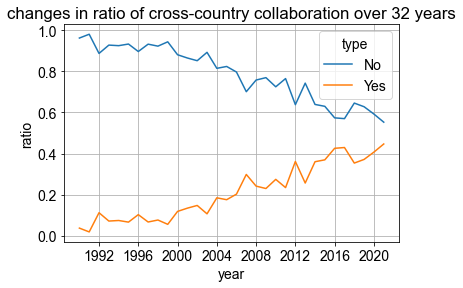

In [26]:
g = sns.lineplot(x='year',
                 y='ratio',
                 hue='type', 
                 data = cross_country
                )
g.set_title('changes in ratio of cross-country collaboration over 32 years')
plt.grid()

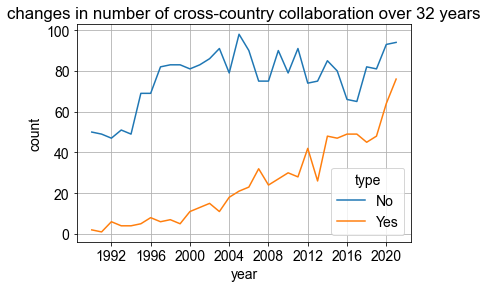

In [27]:
g = sns.lineplot(x='year',
                 y='count',
                 hue='type', 
                 data = cross_country
                )
g.set_title('changes in number of cross-country collaboration over 32 years')
plt.grid()

In [28]:
# (ggplot(cross_country, aes('year', 'count', color='type'))
#  + p9.theme_bw()
#  + p9.geom_line() 
# )

In [29]:
cross_country_ratio = alt.Chart(cross_country).mark_line().encode(
    x = 'year',
    y = alt.Y(
        'ratio',
        title = 'Ratio'
    ),
    color = alt.Color(
        'type',
        title = 'Cross-country collab.',
        sort = ['Yes', 'No'],
        scale=alt.Scale(domain=['Yes', 'No'],
                      range=['steelblue', 'orange'])
    )
)

cross_country_ratio

alt.Chart(...)

In [30]:
cross_country_count = alt.Chart(cross_country).mark_line().encode(
    x = 'year',
    y = alt.Y(
        'count',
        title = 'Number of publications'
    ),
    color = alt.Color(
        'type',
        title = 'Cross-country collab.',
        sort = ['Yes', 'No']
    )
)

cross_country_count 

alt.Chart(...)

### Cross-type collaboration

In [31]:
cross_type = get_total_and_ratio_by_year(
    paper, 
    'Year',
    'Cross-type Collaboration'
)
cross_type['year'] = pd.to_datetime(
    cross_type['year'], format="%Y"
)
cross_type.head()

,year,type,count,ratio
0,1990-01-01,No,47,0.903846
1,1990-01-01,Yes,5,0.096154
2,1991-01-01,No,43,0.860000
3,1991-01-01,Yes,7,0.140000
4,1992-01-01,No,43,0.811321


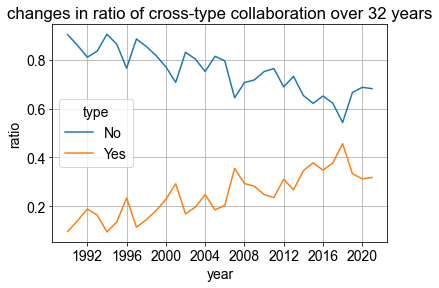

In [32]:
g = sns.lineplot(x='year',
                 y='ratio',
                 hue='type', 
                 data = cross_type
                )
g.set_title('changes in ratio of cross-type collaboration over 32 years')
plt.grid()

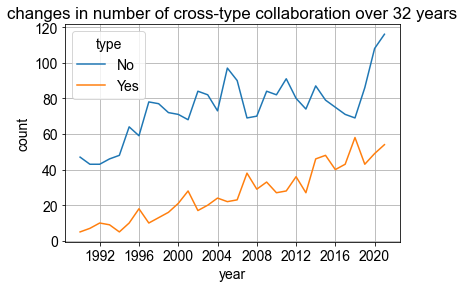

In [33]:
g = sns.lineplot(x='year',
                 y='count',
                 hue='type', 
                 data = cross_type
                )
g.set_title('changes in number of cross-type collaboration over 32 years')
plt.grid()

In [34]:
#         scale=alt.Scale(scheme='set1')
cross_type_ratio = alt.Chart(cross_type).mark_line().encode(
    x = 'year',
    y = alt.Y(
        'ratio',
        title = 'Ratio'
    ),
    color = alt.Color(
        'type',
        title = 'Cross-type collab.',
        sort = ['Yes', 'No'],
        scale=alt.Scale(domain=['No', 'Yes'],
                      range=['purple', 'green'])
    ),
)

cross_type_ratio

alt.Chart(...)

In [35]:
#         scale=alt.Scale(scheme='set1')
cross_type_count = alt.Chart(cross_type).mark_line(
    point={
      "filled": False,
      "fill": "white"
    },
    strokeDash=[1,2]
).encode(
    x = 'year',
    y = alt.Y(
        'count',
        title = 'Number of authors'
    ),
    color = alt.Color(
        'type',
        title = 'Cross-type collab.',
        sort = ['Yes', 'No'],
        scale=alt.Scale(domain=['No', 'Yes'],
                      range=['purple', 'green'])
    ),
)

cross_type_count

alt.Chart(...)

In [36]:
alt.layer(
    cross_type_count,
    cross_country_count
).resolve_scale(
    color='independent'
)

alt.LayerChart(...)

In [37]:
alt.layer(
    cross_type_ratio,
    cross_country_ratio
).resolve_scale(
    color='independent'
)

alt.LayerChart(...)

### Non-VIS VS VIS citations

In [38]:
# VIS PAPERS' OPENALEX IDS
ids = paper['OpenAlex ID'].tolist()
len(list(set(ids))) == paper.shape[0]

True

In [39]:
ref = pd.read_csv('../data/processed/openalex_reference_paper_df.csv')
ref = ref[ref['OpenAlex ID'].notnull()]

In [40]:
cit = pd.read_csv('../data/processed/openalex_citation_paper_df.csv')
cit = cit[cit['Citation Paper OpenAlex ID'].notnull()]

In [41]:
ref['VIS'] = ref['OpenAlex ID'].apply(
    lambda x: 'Yes' if x in ids else 'No'
)

In [42]:
cit['VIS'] = cit['Citation Paper OpenAlex ID'].apply(
    lambda x: 'Yes' if x in ids else 'No'
)

In [43]:
tuples = []
for group in cit.groupby('OpenAlex Year'):
    year = group[0]
    total = group[1].shape[0]
    for subgroup in group[1].groupby('VIS'):
        type_of_paper = subgroup[0] # true or false
        count = subgroup[1].shape[0]
        ratio = count / total
        tuples.append((year, type_of_paper, count, ratio))

In [44]:
cit_df = pd.DataFrame(list(tuples), columns=['year', 'type', 'count', 'ratio']) 

In [45]:
cit_df = cit_df[(cit_df.year >= 1990) & (cit_df.year <= 2021)]
cit_df['Year'] = pd.to_datetime(cit_df['year'], format='%Y')
cit_df.replace({'Yes': 'VIS', 'No': 'Non-VIS'}, inplace=True)
cit_df.head()

,year,type,count,ratio,Year
3,1990.0,Non-VIS,6,0.750000,1990-01-01
4,1990.0,VIS,2,0.250000,1990-01-01
5,1991.0,Non-VIS,56,0.736842,1991-01-01
6,1991.0,VIS,20,0.263158,1991-01-01
7,1992.0,Non-VIS,113,0.710692,1992-01-01


In [46]:
cit_df[cit_df.year.isin([2021, 2011])]

,year,type,count,ratio,Year
45,2011.0,Non-VIS,6091,0.888938,2011-01-01
46,2011.0,VIS,761,0.111062,2011-01-01
65,2021.0,Non-VIS,11309,0.843703,2021-01-01
66,2021.0,VIS,2095,0.156297,2021-01-01


Text(0, 0.5, 'Ratio')

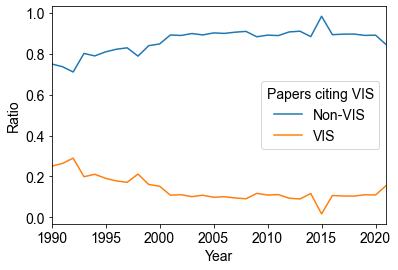

In [47]:
g = sns.lineplot(x='year', y='ratio', hue='type', data = cit_df)
g.set_xlim(1990,2021)
g.legend(title = 'Papers citing VIS', labels = ['Non-VIS', 'VIS'])
g.set_xlabel('Year')
g.set_ylabel('Ratio')

In [48]:
to_plot_stackarea = []
for type_group in cit_df.groupby('type'):
    a_list = type_group[1]['count'].tolist()
    to_plot_stackarea.append(a_list)

In [49]:
len(to_plot_stackarea[0]) == len(to_plot_stackarea[1])

True

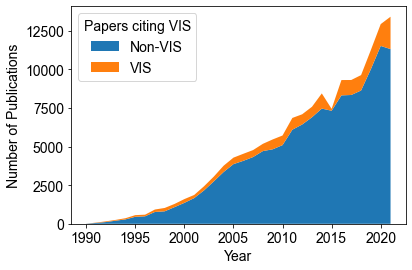

In [50]:
plt.stackplot(range(1990, 2022), to_plot_stackarea, 
              labels=['Non-VIS', 'VIS'])
plt.legend(title= 'Papers citing VIS', loc='upper left')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.show()

In [51]:
# Using Altair

source = cit_df

chart1 = alt.Chart(source).mark_area().encode(
    x="Year:T",
    y="count:Q",
    color=alt.Color(
        "type:N",
        title = 'Type',
        scale=alt.Scale(
            domain=['VIS', 'Non-VIS'],
            range=['skyblue', 'pink']
        )
        
    )
)

chart12 = alt.Chart(source).mark_line().encode(
    x='Year',
    y='ratio',
    color=alt.Color(
        "type:N",
        title = 'Type',
        scale=alt.Scale(
            domain=['VIS', 'Non-VIS'],
            range=['green', 'purple']
        )
        
    )
)

alt.hconcat(chart1, chart12)


alt.HConcatChart(...)

### Non-VIS VS VIS References

In [52]:
ref.head(3)

,Year,DOI,Title,Number of References,Index of Reference,Reference,OpenAlex Year,OpenAlex Publication Date,OpenAlex ID,OpenAlex Title,...,Publication Type,OpenAlex First Page,OpenAlex Last Page,Number of References for Reference paper,Number of Citations,Number of Authors,Number of Concepts,Citation API URL,Number of Citation API URLs,VIS
0,2011,10.1109/TVCG.2011.185,D³ Data-Driven Documents,27.0,1.0,https://openalex.org/W146699588,2005.0,2005-07-01,W146699588,The Grammar of Graphics (Statistics and Comput...,...,book,NaN,NaN,0.0,113.0,1.0,4.0,https://api.openalex.org/works?filter=cites:W1...,1.0,No
1,2011,10.1109/TVCG.2011.185,D³ Data-Driven Documents,27.0,2.0,https://openalex.org/W1516293359,1999.0,1999-01-01,W1516293359,Readings in Information Visualization: Using V...,...,book,NaN,NaN,0.0,3082.0,3.0,13.0,https://api.openalex.org/works?filter=cites:W1...,1.0,No
2,2011,10.1109/TVCG.2011.185,D³ Data-Driven Documents,27.0,3.0,https://openalex.org/W1587026990,2009.0,2009-08-13,W1587026990,ggplot2: Elegant Graphics for Data Analysis,...,book,NaN,NaN,0.0,18282.0,1.0,10.0,https://api.openalex.org/works?filter=cites:W1...,1.0,No


In [53]:
tuples = []
for group in ref.groupby('Year'):
    year = group[0]
    total = group[1].shape[0]
    for subgroup in group[1].groupby('VIS'):
        type_of_paper = subgroup[0] 
        count = subgroup[1].shape[0]
        ratio = count / total
        tuples.append((year, type_of_paper, count, ratio))

In [54]:
ref_df = pd.DataFrame(list(tuples), columns=['year', 'type', 'count', 'ratio']) 

In [55]:
ref_df = ref_df[(ref_df.year >= 1990) & (ref_df.year <= 2021)]
ref_df['Year'] = pd.to_datetime(ref_df['year'], format='%Y')
ref_df.replace({'No': 'Non-VIS', 'Yes': 'VIS'}, inplace = True)
ref_df.head()

,year,type,count,ratio,Year
0,1990,Non-VIS,590,0.996622,1990-01-01
1,1990,VIS,2,0.003378,1990-01-01
2,1991,Non-VIS,402,0.952607,1991-01-01
3,1991,VIS,20,0.047393,1991-01-01
4,1992,Non-VIS,528,0.919861,1992-01-01


Text(0, 0.5, 'Ratio')

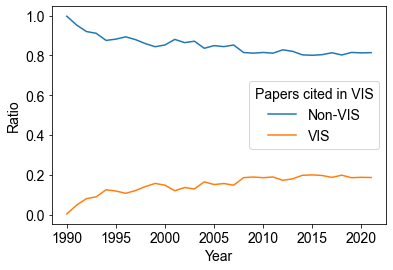

In [56]:
g = sns.lineplot(x='year', y='ratio', hue='type', data = ref_df)
# g.set_xlim(1990,2021)
g.legend(title = 'Papers cited in VIS', labels = ['Non-VIS', 'VIS'])
g.set_xlabel('Year')
g.set_ylabel('Ratio')

In [57]:
# Using Altair

source = ref_df

chart1 = alt.Chart(source).mark_area().encode(
#     x="Year:T",
    alt.X('Year:T', axis=alt.Axis(title="Year")),
    alt.Y('count:Q', axis=alt.Axis(title="Raio")),
    color="type:N"
)

chart22 = alt.Chart(source).mark_line().encode(
    alt.X('Year:T', axis=alt.Axis(title="Year")),
    alt.Y('ratio:Q', axis=alt.Axis(title="Raio")),
    color='type',
)

alt.hconcat(chart1, chart22).configure_axis(
    labelFontSize=13,
    titleFontSize=14,
)

alt.HConcatChart(...)

In [58]:
alt.layer(
    chart12,
    chart22
).resolve_scale(
    color='independent'
)

alt.LayerChart(...)

## Subplots

To include eight charts:

- conference track
- number of pubs
- number of unique authors
- vis vs non-vis citations
- citation & reference ratio changes
- cross-country collab., ratio
- cross-type collab., ratio
- cross-country & cross-type, absolute count

In [59]:
conf = alt.Chart(conf_df).mark_bar().encode(
    x = alt.X(
        'Conference track',
        sort = [
            'VIS',
            'SciVis',
            'VAST',
            'InfoVis',
            'Vis',
        ],
        axis=alt.Axis(labelAngle=-20)
    ),
    y = 'Number of publications',
    color = alt.Color(
        'Conference track',
        legend=None,
    )
).properties(
    title = 'a',
    width=200
)

conf

pub_num = alt.Chart(pub_num_df).mark_line().encode(
    x = 'Year',
    y = alt.Y(
        'Number of Publications',
        title = 'Number of publications'
    )
).properties(
    title = 'b',
    width=300
)

pub_num

unique_authors = alt.Chart(unique_author_num_df).mark_line().encode(
    x = 'Year',
    y = alt.Y(
        'Number of Unique Authors',
        title = 'Number of unique authors'
    )
).properties(
    title = 'c',
    width=300,
)

unique_authors

vis_cit = alt.Chart(cit_df).mark_area().encode(
    x="Year:T",
    y = alt.Y(
        "count:Q",
        title = 'Number of citations'
    ),
    color=alt.Color(
        "type:N",
        title = 'Who cited VIS',
        scale=alt.Scale(
            domain=['Non-VIS', 'VIS'],
            range=['hotpink', 'skyblue']
        ),
        legend=alt.Legend(
            orient='top-left',
#             legendX=60, legendY=-40,
#             direction='horizontal',
#             titleAnchor='middle'
    )
        
    )
).properties(
    title = 'd',
    width=300,
)

vis_cit

trends1 = alt.hconcat(
    conf,
    pub_num,
    unique_authors,
    vis_cit
).resolve_scale(
    color = 'independent'
).configure_axis(
    labelFontSize=15,
    titleFontSize=20
).configure_legend(
    titleFontSize=14,
    labelFontSize=16
).configure_title(
    anchor='start',
    fontSize=22)

trends1

alt.HConcatChart(...)

In [60]:
# trends1.save('chart.png')

In [61]:
ratio_wording = 'Proportion'

In [62]:
cit_ratio = alt.Chart(cit_df).mark_line(
    point={
      "filled": False,
      "fill": "white"
    },
    strokeDash=[1,2]
).encode(
    x='Year',
    y=alt.Y(
        'ratio',
        title=ratio_wording
    ),
    color=alt.Color(
        "type:N",
        title = 'Who cited VIS',
        scale=alt.Scale(
            domain=['Non-VIS', 'VIS'],
            range=['purple', 'green']
        ),
        legend=alt.Legend(
            orient='none',
            legendX=0, legendY=-40,
            direction='horizontal',
            titleAnchor='middle'
        )
    )
)

cit_ratio

ref_ratio = alt.Chart(ref_df).mark_line(
).encode(
    x='Year',
    y=alt.Y(
        'ratio',
        title = ratio_wording
    ),
    color=alt.Color(
        "type:N",
        title = 'Whom VIS cited',
        scale=alt.Scale(
            domain=['Non-VIS', 'VIS'],
            range=['orange', 'steelblue']
        ),
        legend=alt.Legend(
            orient='none',
            legendX=150, legendY=-40,
            direction='horizontal',
            titleAnchor='middle'
        ),
    )
)

ref_ratio

citation_ratio_compare = alt.layer(
    cit_ratio,
    ref_ratio,
).resolve_scale(
    color='independent'
).properties(
    title = 'e',
    width=280
)

citation_ratio_compare

cross_country_ratio = alt.Chart(cross_country).mark_line().encode(
    x = alt.X('year', title='Year'),
    y = alt.Y(
        'ratio',
        title = ratio_wording
    ),
    color = alt.Color(
        'type',
        title = 'Cross-country',
        scale=alt.Scale(domain=['No', 'Yes'],
                      range=['orange', 'steelblue']),
        legend=alt.Legend(
            orient='none',
            legendX=80, legendY=-40,
            direction='horizontal',
            titleAnchor='middle'
        )
    )
).properties(
    title = 'f',
    width=280
)

cross_country_ratio

cross_type_ratio = alt.Chart(cross_type).mark_line().encode(
    x = alt.X('year', title='Year'),
    y = alt.Y(
        'ratio',
        title = ratio_wording
    ),
    color = alt.Color(
        'type',
        title = 'Cross-type',
#         sort = ['Yes', 'No'],
        scale=alt.Scale(domain=['No', 'Yes'],
                      range=['purple', 'green']),
        legend=alt.Legend(
            orient='none',
            legendX=90, legendY=-40,
            direction='horizontal',
            titleAnchor='middle'
        )
    )
).properties(
    title = 'g',
    width=280
)

cross_type_ratio

cross_country_count = alt.Chart(cross_country).mark_line(
).encode(
    x = alt.X('year', title='Year'),
    y = alt.Y(
        'count',
        title = 'Number of publications'
    ),
    color = alt.Color(
        'type',
        title = 'Cross-country',
        scale=alt.Scale(domain=['No', 'Yes'],
                      range=['orange', 'steelblue']),
        legend=alt.Legend(
            orient='none',
            legendX=0, legendY=-40,
            direction='horizontal',
            titleAnchor='middle'
    )
))

cross_country_count 

cross_type_count = alt.Chart(cross_type).mark_line(
    point={
      "filled": False,
      "fill": "white"
    },
    strokeDash=[1,2]
).encode(
    x = alt.X('year', title='Year'),
    y = alt.Y(
        'count',
        title = 'Number of publications'
    ),
    color = alt.Color(
        'type',
        title = 'Cross-type',
        sort = ['Yes', 'No'],
        scale=alt.Scale(domain=['No', 'Yes'],
                      range=['purple', 'green']),
        legend=alt.Legend(
            orient='none',
            legendX=180, legendY=-40,
            direction='horizontal',
            titleAnchor='middle'
    )),
)

cross_type_count

count_compare = alt.layer(
    cross_type_count,
    cross_country_count
).resolve_scale(
    color='independent'
).properties(
    title = 'h',
    width=280
)

count_compare

trends2 = alt.hconcat(
    citation_ratio_compare,
    cross_country_ratio,
    cross_type_ratio,
    count_compare
).resolve_scale(
    color = 'independent'
).configure_axis(
    labelFontSize=15,
    titleFontSize=20
).configure_legend(
    titleFontSize=16,
    labelFontSize=16
).configure_title(
    anchor='start',
    fontSize=22)

trends2

alt.HConcatChart(...)

In [63]:
# f, axs = plt.subplots(1,4,
#                       figsize=(20, 5),
#                       sharex=False,
#                       sharey=False,
#                       gridspec_kw=dict(width_ratios=[1,1,1,1]))
# sns.set_style("whitegrid")
# sns.set_palette('Set1')
# # sns.set_palette('bright')

# # sns.set(font_scale=1.5)

# ## Number of publications by year
# g0 = sns.lineplot(
#     x = 'Year', 
#     y = 'Number of Publications', 
#     data = pub_num_df,
#     ax = axs[0]
# )
# g0.set_ylim(0,)
# g0.text(-0.1, 1.1, 'A', transform=g0.transAxes, 
#             size=20, weight='bold')


# # Number of unique authors by year
# g1 = sns.lineplot(x = 'Year', 
#                  y= 'Number of Unique Authors', 
#                  data = unique_author_num_df,
#                  ax = axs[1]
#                 )
# g1.set_ylim(0,)
# g1.text(-0.1, 1.1, 'B', transform=g1.transAxes, 
#             size=20, weight='bold')

# # cross-country
# g2 = sns.lineplot(x='year',
#                  y='ratio',
#                  hue='type', 
#                  data = cross_country,
#                  ax = axs[2],
#                 )
# g2.legend(title = 'Cross-country')
# g2.set_xlabel('Year')
# g2.set_ylabel('Ratio')
# g2.text(-0.1, 1.1, 'C', transform=g2.transAxes, 
#             size=20, weight='bold')

# # cross-type
# g3 = sns.lineplot(x='year',
#                  y='ratio',
#                  hue='type', 
#                  data = cross_type,
#                  ax = axs[3]
#                 )
# g3.legend(title = 'Cross-type')
# g3.set_xlabel('Year')
# g3.set_ylabel('Ratio')
# g3.text(-0.1, 1.1, 'D', transform=g3.transAxes, 
#             size=20, weight='bold')

# # # Citations from vis and non-vis papers
# # plt.subplot(1,5,5)
# # plt.stackplot(range(1990, 2022), 
# #               to_plot_stackarea, 
# #               labels=['Non-VIS', 'VIS'],
# #              )
# # plt.legend(title= 'Papers citing VIS', loc='upper left')
# # plt.xlabel('Year')
# # plt.ylabel('Number of Publications')

# # plt.show()
# f.tight_layout()
# f.savefig('../results/figures/trends.png', dpi = 200)